In [27]:
import ipywidgets as ip

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)
import numpy as np
import uncertainties as u
from uncertainties import unumpy
import math as math

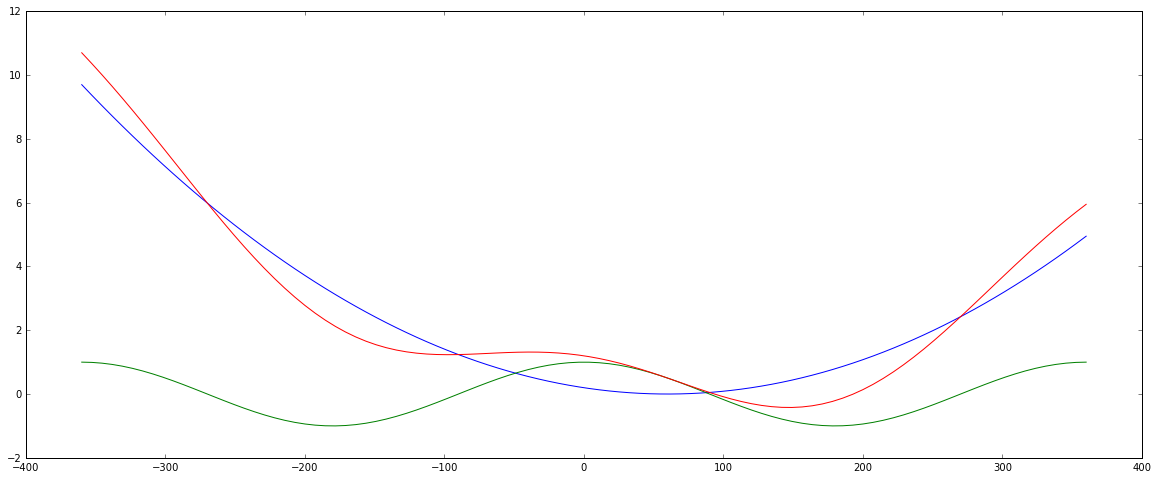

In [28]:
# resolution of simulation
steps = 100

# Magnetic dipole
muStrength = 1
muDirection = np.linspace(-360, 360, steps)

# define the external field
magneticFieldStrength = 1
magneticFieldDirection = 180


kappa = .00011 # torsion constant of the torsion fiber

torsionZero = 60 # torsional zero in degrees
# the potential energy of the 
torsionFiberPotentialEnergy = (1/2)*kappa*(muDirection - torsionZero)**2

# calculate the dot product
magneticDipolePotentialEnergy = -1 * muStrength * magneticFieldStrength * np.cos( np.deg2rad(magneticFieldDirection - muDirection) )

totalPotentialEnergy = torsionFiberPotentialEnergy + magneticDipolePotentialEnergy

plt.plot(muDirection, torsionFiberPotentialEnergy)
plt.plot(muDirection, magneticDipolePotentialEnergy)
plt.plot(muDirection, totalPotentialEnergy)
plt.show()

# we are looking for equlibrium positions that are less than 360deg away from each other. 

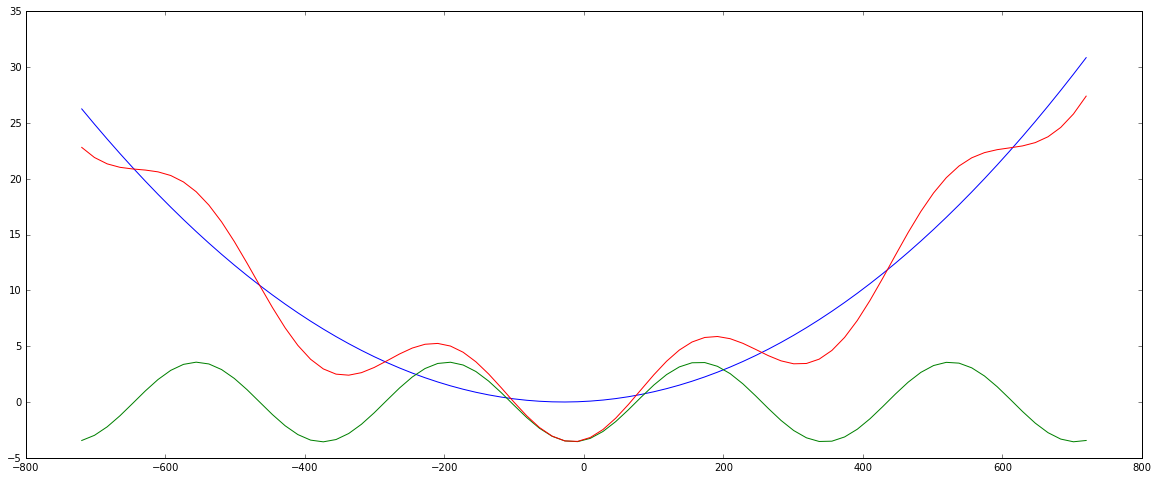

In [29]:
def recalculate_potential_energy(magneticFieldDirection, torsionZero, magneticFieldStrength):
    # resolution of simulation
    steps = 80

    # Magnetic dipole
    muStrength = 1
    muDirection = np.linspace(-720, 720, steps)

    # define the external field
    magneticFieldStrength = 1
    magneticFieldDirection = 180


    kappa = .00011 # torsion constant of the torsion fiber

    #torsionZero = 60 # torsional zero in degrees
    # the potential energy of the 
    torsionFiberPotentialEnergy = (1/2)*kappa*(muDirection - torsionZero)**2

    # calculate the dot product
    magneticDipolePotentialEnergy = -1 * muStrength * magneticFieldStrength * np.cos( np.deg2rad(magneticFieldDirection - muDirection) )

    totalPotentialEnergy = torsionFiberPotentialEnergy + magneticDipolePotentialEnergy
    
    plt.plot(muDirection, torsionFiberPotentialEnergy)
    plt.plot(muDirection, magneticDipolePotentialEnergy)
    plt.plot(muDirection, totalPotentialEnergy)
    plt.show()
    
ip.interact(recalculate_potential_energy
            , magneticFieldDirection = widgets.IntSlider(min=-360,max=360,step=15,value=0)
            , torsionZero = widgets.IntSlider(min=-360,max=360,step=1,value=0)
            , magneticFieldStrengthAlongOpticalAxis = (0.1,5.0,0.01))

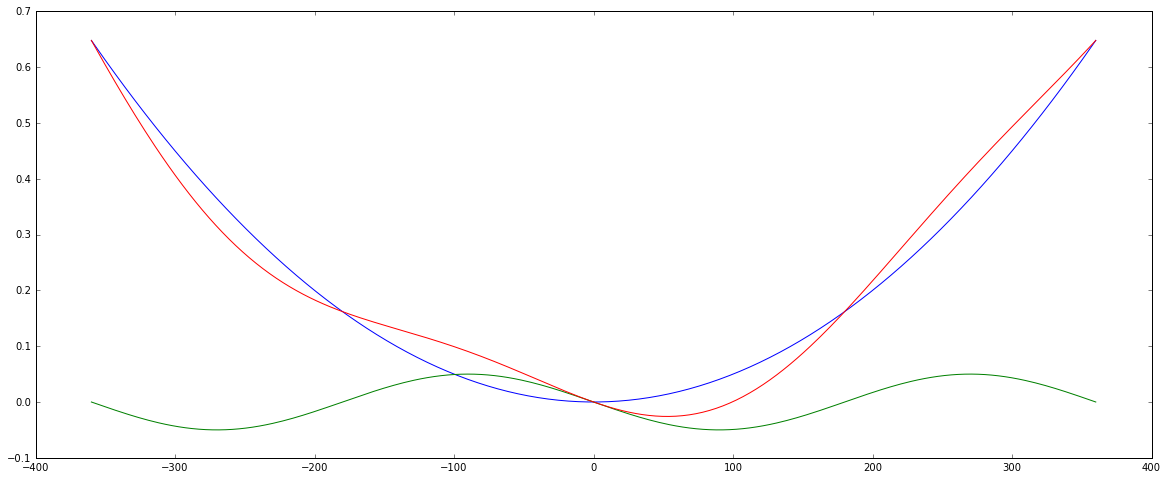

In [78]:
def constant_equilibrium_position(xField,
                                  yField, 
                                  torsionZero):
    # resolution of simulation
    steps = 300
    
    # Magnetic dipole
    muStrength = 1
    muDirection = np.linspace(-360, 360, steps) # sweep through all the values
    
    kappa = 0.00001 # torsion constant of the torsion fiber
    
    # define the x field from the torsion properties 
    # field perpendictualr to the optical axis
    xField = -1* kappa * torsionZero / muStrength # field ofset from the optical zero
    #print(xField)
    
    
    magneticFieldStrength = (xField**2 + yField**2)**(1/2)
    magneticFieldDirection = np.rad2deg(np.arctan2(yField,xField))
    
    
    torsionFiberPotentialEnergy = (1/2)*kappa*(muDirection - torsionZero)**2
    
    # calculate the dot product
    magneticDipolePotentialEnergy = -1 * muStrength * magneticFieldStrength * np.cos( np.deg2rad(magneticFieldDirection - muDirection) )
    
    totalPotentialEnergy = torsionFiberPotentialEnergy + magneticDipolePotentialEnergy
    
    plt.plot(muDirection, torsionFiberPotentialEnergy)
    plt.plot(muDirection, magneticDipolePotentialEnergy)
    plt.plot(muDirection, totalPotentialEnergy)
    plt.show()
    
    
ip.interact(constant_equilibrium_position,
            xField=(-2,2,0.05),
            yField=(-2,2,0.05), 
            torsionZero=(-180,180,15))
    

In [ ]:
# now see if you can center on the magnetic zero 